<a href="https://colab.research.google.com/github/taskinnasif144/simple_nn_pytorch/blob/main/pythorch_simple_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import torch

import torch.nn as nn
import torch.nn.functional as F

In [163]:
#creating a model class that inherits nn.modules

class Model(nn.Module):
  #input layer (4 features of ouur flower) --> hidden layers --> next layer ---> output
  def __init__(self, in_features=4, h1=8, h2=8, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [164]:
#pick a manual seed for randomization
torch.manual_seed(41)

#create an instance of model
model = Model()


In [165]:
import matplotlib.pyplot as plt
import pandas as pd

In [166]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [167]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [168]:
my_df['species'].replace('setosa', 0, inplace=True)
my_df['species'].replace('versicolor', 1, inplace=True)
my_df['species'].replace('virginica', 2, inplace=True)

my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [169]:
#train test split set:x, y

x = my_df.drop('species', axis=1)
y = my_df['species']

#converting to numpy array
x = x.values
y = y.values

In [170]:
#train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

In [171]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [172]:
criterion = nn.CrossEntropyLoss()
#choosing optimizers and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [173]:
#training the model

epochs = 200
losses = []

for i in range(epochs):

  y_pred = model.forward(x_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())
  if i%10 == 0:
    print(f'Epoch {i}: {loss}')

  if i == 199:
    print(f'epoch {i}: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch 0: 1.1235369443893433
Epoch 10: 0.9660394191741943
Epoch 20: 0.67831951379776
Epoch 30: 0.4017921984195709
Epoch 40: 0.22827763855457306
Epoch 50: 0.13060733675956726
Epoch 60: 0.09034084528684616
Epoch 70: 0.07487709075212479
Epoch 80: 0.06784187257289886
Epoch 90: 0.06388811022043228
Epoch 100: 0.06125100702047348
Epoch 110: 0.05929027870297432
Epoch 120: 0.05773155018687248
Epoch 130: 0.056437473744153976
Epoch 140: 0.05533292144536972
Epoch 150: 0.05437059327960014
Epoch 160: 0.053518589586019516
Epoch 170: 0.05275452882051468
Epoch 180: 0.05206216871738434
Epoch 190: 0.051429882645606995
epoch 199: 0.05090503767132759


Text(0, 0.5, 'Loss')

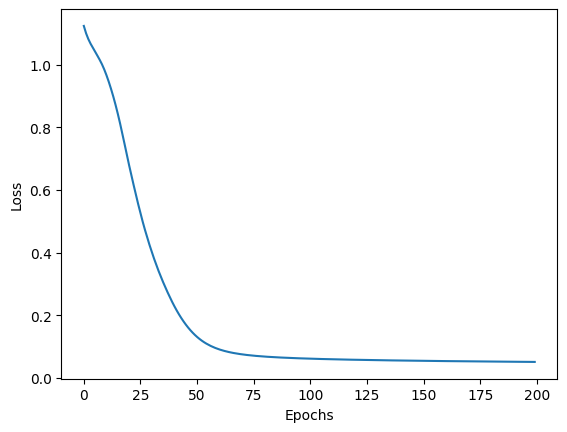

In [174]:
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')


In [175]:
#evaluate model on test dataset

with torch.no_grad(): #turing off back propagation
  y_eval = model.forward(x_test)
  loss = criterion(y_eval, y_test)
  print(loss)

tensor(0.0308)


In [178]:
correct = 0

with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model(data)
    print(f'{i} : {torch.argmax(y_val)} \t {y_test[i]}')
    if torch.argmax(y_val) == y_test[i]:
      correct += 1


correct


0 : 1 	 1
1 : 0 	 0
2 : 0 	 0
3 : 1 	 1
4 : 2 	 2
5 : 2 	 2
6 : 0 	 0
7 : 0 	 0
8 : 1 	 1
9 : 0 	 0
10 : 1 	 1
11 : 2 	 2
12 : 1 	 1
13 : 1 	 1
14 : 2 	 2
15 : 2 	 2
16 : 1 	 1
17 : 2 	 2
18 : 1 	 1
19 : 0 	 0
20 : 0 	 0
21 : 2 	 2
22 : 2 	 2
23 : 0 	 0
24 : 0 	 0
25 : 1 	 1
26 : 0 	 0
27 : 2 	 2
28 : 0 	 0
29 : 0 	 0


30